In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [36]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Billionaire.csv")
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [38]:
data.shape

(2755, 7)

In [39]:
data.drop_duplicates()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified


In [40]:
(data
    .isnull()
    .sum()
)

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [41]:
mask = data['Age'].isnull()
data = data[~mask]
data.shape

(2676, 7)

In [42]:
data['NetWorth'] = data['NetWorth'].str.replace('[\$ a-zA-Z]+','', regex=True)
data.rename(columns={'NetWorth':'NetWorth[Billones]'}, inplace=True)
data['NetWorth[Billones]'] = data['NetWorth[Billones]'].astype(np.float64)

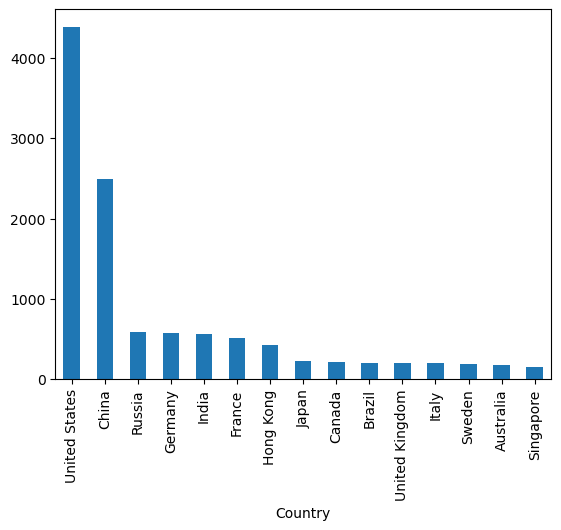

In [43]:
(data
.groupby('Country')['NetWorth[Billones]']
.sum()
.sort_values(ascending=False)
.head(15)
.plot.bar()
)
plt.show()

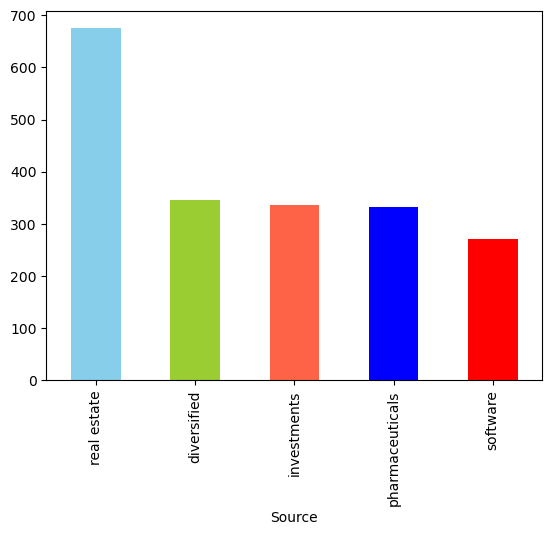

In [44]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
(data
.groupby('Source')['NetWorth[Billones]']
.sum()
.sort_values(ascending=False)
.head(5)
.plot.bar(color = custom_colors)
)
plt.show()

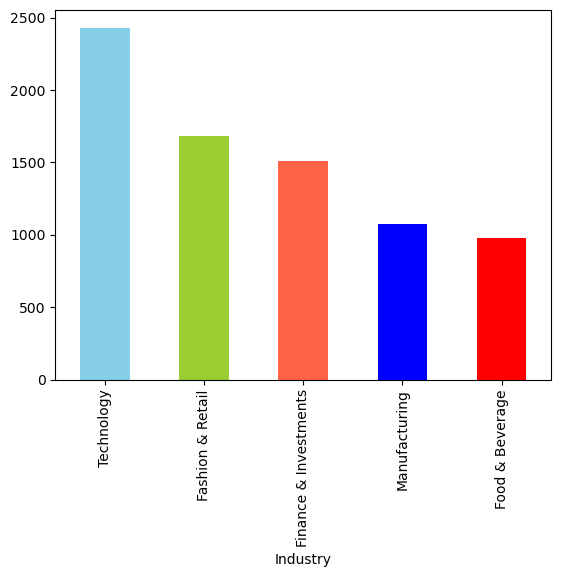

In [45]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
(data
.groupby('Industry')['NetWorth[Billones]']
.sum()
.sort_values(ascending=False)
.head(5)
.plot.bar(color = custom_colors)
)
plt.show()

**Total sum of NetWorth grouped by country**

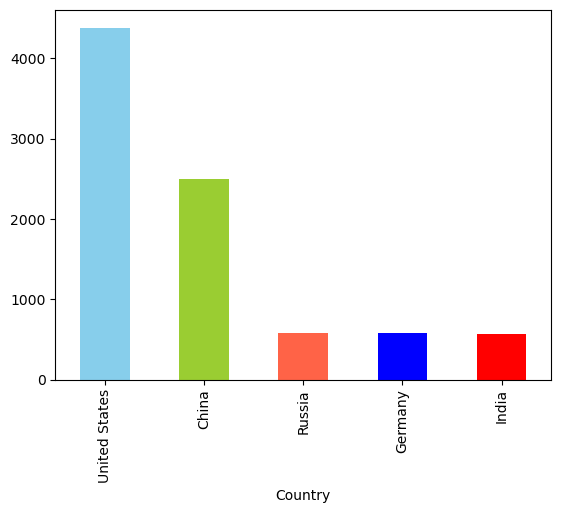

In [46]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
(data
.groupby('Country')['NetWorth[Billones]']
.sum()
.sort_values(ascending=False)
.head(5)
.plot
.bar(color=custom_colors)
)
plt.show()

**Number of millonaries per countries**

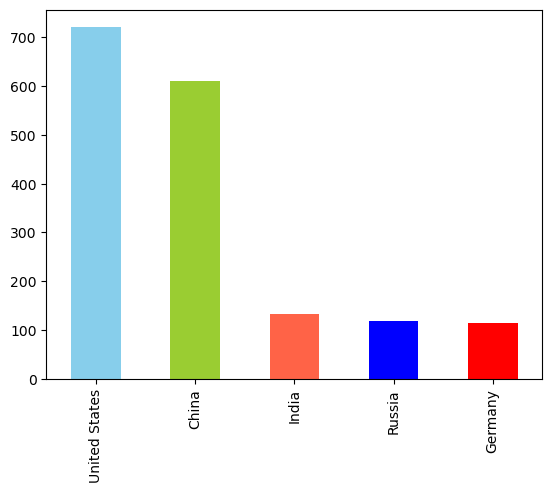

In [47]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
(data['Country']
    .value_counts(ascending=False)
    .head(5)
    .plot
    .bar(color=custom_colors)

)
plt.show()

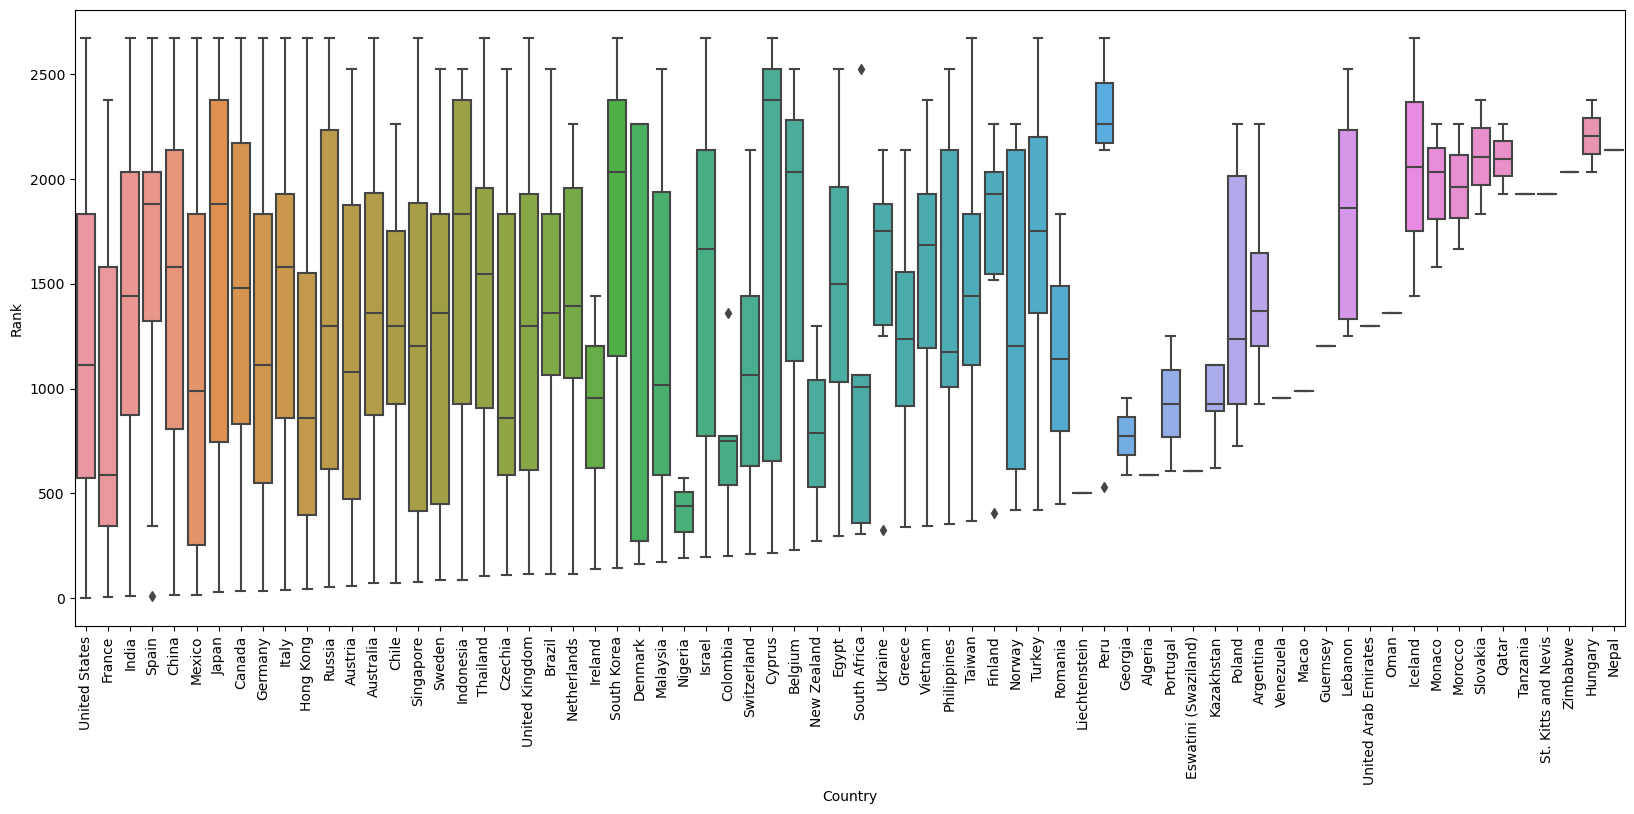

In [48]:
fig = plt.figure(figsize=(20,8))
ax = sns.boxplot(x = 'Country', y = 'Rank', data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

**Industry sectors where the most import billonaries come from**

<AxesSubplot: >

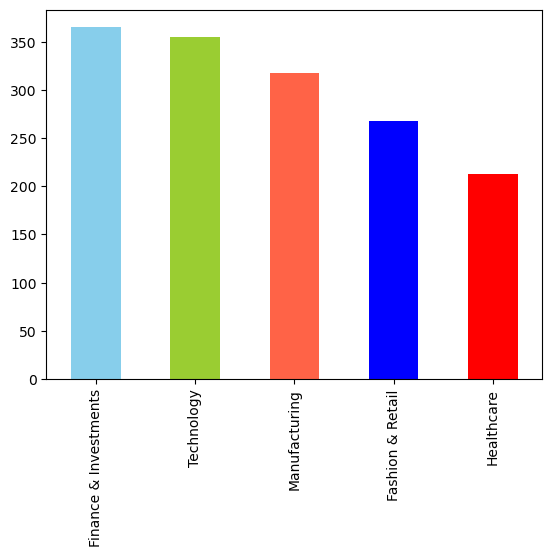

In [49]:
(data['Industry']
    .value_counts(ascending=False)
    .head(5)
    .plot
    .bar(color=custom_colors)

)

